<a href="https://colab.research.google.com/github/nehaal10/pneumonia-predictor/blob/main/pneumonia_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import os
import shutil
import glob
import filecmp
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd()

'/content'

In [ ]:
shutil.rmtree('/content/drive/MyDrive/Dataset/Project/chest_xray')

In [ ]:
os.mkdir('/content/drive/MyDrive/Dataset/Project')

In [ ]:
path='/content/drive/MyDrive/kaggle'
os.chdir(path)

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']=path
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:31<00:00, 103MB/s]
100% 2.29G/2.29G [00:31<00:00, 78.5MB/s]


In [ ]:
dest='/content/drive/MyDrive/Dataset/Project'
src='/content/drive/MyDrive/kaggle/chest-xray-pneumonia.zip'
shutil.move(src,dest)

os.chdir(dest)
! unzip -q 'chest-xray-pneumonia.zip'

In [ ]:
os.chdir(dest+'/chest_xray')
for i in os.listdir():
  if (i=='__MACOSX') or (i=='chest_xray'):
    shutil.rmtree(i)

In [ ]:
dest='/content/drive/MyDrive/Dataset/Project'
os.chdir(dest)
! unzip -q 'chest-xray-pneumonia.zip'

# RESIZING THE IMAGES FROM ALL DIRECTORIES

In [ ]:
w=250
h=250
dim=(h,w)
path_train_normal='/content/drive/MyDrive/Dataset/Project/chest_xray/train/NORMAL'
path_train_pneumonia='/content/drive/MyDrive/Dataset/Project/chest_xray/train/PNEUMONIA'
path_val_normal='/content/drive/MyDrive/Dataset/Project/chest_xray/test/NORMAL'
path_val_pneumonia='/content/drive/MyDrive/Dataset/Project/chest_xray/test/PNEUMONIA'
path_test_normal='/content/drive/MyDrive/Dataset/Project/chest_xray/val/NORMAL'
path_test_pneumonia='/content/drive/MyDrive/Dataset/Project/chest_xray/val/PNEUMONIA'
path=[path_train_normal,path_train_pneumonia,path_val_normal,path_val_pneumonia,path_test_normal,path_test_pneumonia]

for i in path:
  os.chdir(i)
  for img in os.listdir(i):
    image=cv2.imread(img)
    resize=cv2.resize(image,dim)
    os.remove(img)
    cv2.imwrite(img,resize)

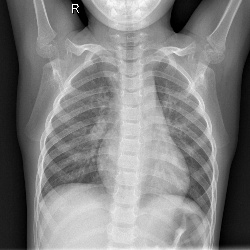

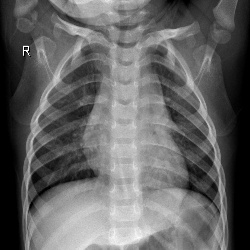

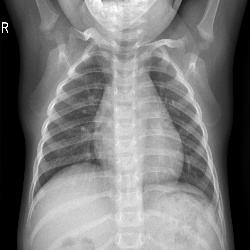

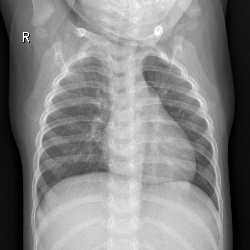

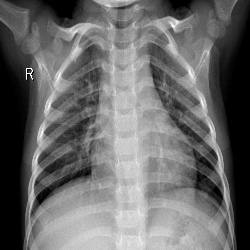

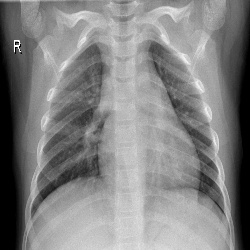

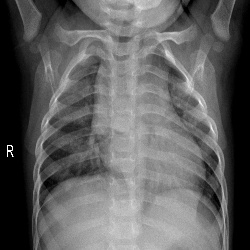

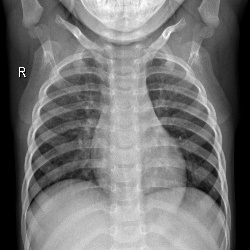

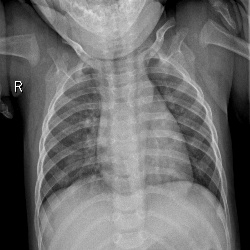

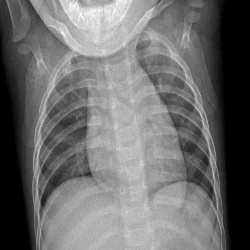

In [ ]:
os.chdir('/content/drive/MyDrive/Dataset/Project/chest_xray/train/NORMAL')
for i in  os.listdir('/content/drive/MyDrive/Dataset/Project/chest_xray/train/NORMAL')[:10]:
  cv2_imshow(cv2.imread(i))

#Correcting Imbalanced Data

In [ ]:
n_l=len(os.listdir('/content/drive/MyDrive/Dataset/Project/chest_xray/train/NORMAL'))
p_l=len(os.listdir('/content/drive/MyDrive/Dataset/Project/chest_xray/train/PNEUMONIA'))

imb_l=p_l-n_l
imb_l

0

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(
                                                        rotation_range=45,
                                                        width_shift_range=0.3,
                                                        height_shift_range=0.3,
                                                        shear_range=0.4,
                                                        zoom_range=0.2,
                                                        horizontal_flip=0.3,
                                                        fill_mode='nearest'
                                                        )
i=0
os.chdir('/content/drive/MyDrive/Dataset/Project/chest_xray/train/NORMAL')
data=[]
for i in os.listdir()[:1000]:
  if '.ipynb'not in i :
    img=cv2.imread(i)
    img=tf.keras.preprocessing.image.img_to_array(img)
    data.append(img)

data=np.array(data)
i=0
for b in datagen.flow(data,
                      batch_size=1,   
                      save_to_dir='/content/drive/MyDrive/Dataset/Project/chest_xray/train/NORMAL',   
                      save_prefix='aug',    
                      save_format='jpeg'):    
   i += 1    
   if i==imb_l:        
     break

# getting the data from direcrory

In [2]:
train_path='/content/drive/MyDrive/Dataset/Project/chest_xray/train'
valid_path='/content/drive/MyDrive/Dataset/Project/chest_xray/test'
test_path='/content/drive/MyDrive/Dataset/Project/chest_xray/val'

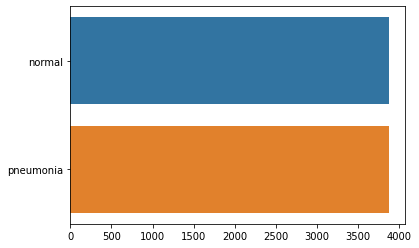

In [3]:
train_normal=os.listdir(train_path+'/NORMAL')
train_pneumonia=os.listdir(train_path+'/PNEUMONIA')
value=[len(train_normal),len(train_pneumonia)]
label=['normal','pneumonia']
sns.barplot(x=value,y=label)

In [17]:


train_generator=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.3,
                                                                horizontal_flip=True,
                                                                rescale=1.0/255,
                                                                fill_mode='nearest'
                                                                )

valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input,
                                                                rescale=1.0/255)

train=train_generator.flow_from_directory(
    train_path,
    target_size=(250,250),
    shuffle=True,
    batch_size=128,
    class_mode='binary',
    
    seed=42
)
valid=valid_generator.flow_from_directory(
    valid_path,
    target_size=(250,250),
    color_mode='rgb',
    shuffle=True,
    batch_size=32,
    class_mode='binary',
    seed=42
)
test=valid_generator.flow_from_directory(
    test_path,
    target_size=(250,250),
    color_mode='rgb',
    shuffle=False,
    batch_size=32,
    class_mode='binary',
    seed=42
)

Found 7750 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [18]:
class_name=list(train.class_indices.keys())

In [19]:
class_name

['NORMAL', 'PNEUMONIA']

In [20]:
img,label=next(train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

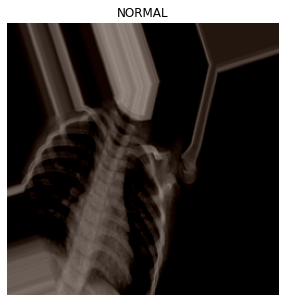

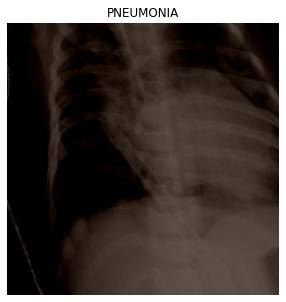

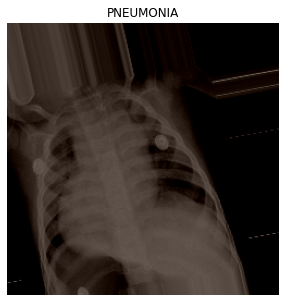

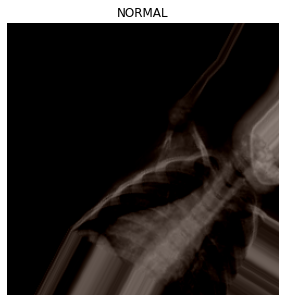

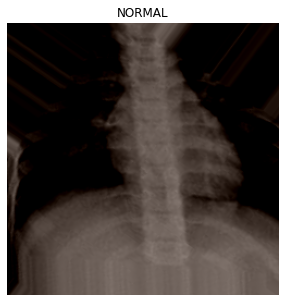

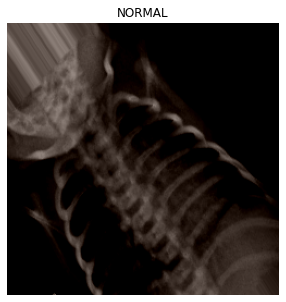

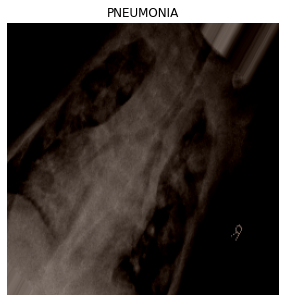

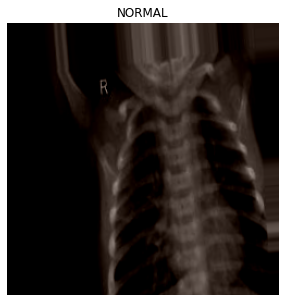

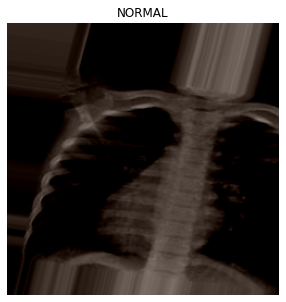

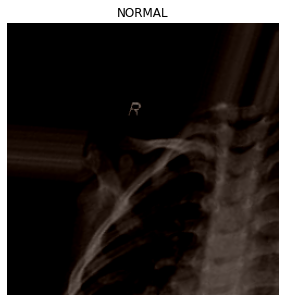

In [21]:
for num,i in enumerate(img[:10]):
  plt.figure(figsize=(5,5))
  plt.imshow(i)
  plt.title(class_name[int(label[num])])
  plt.axis('off')

# Transfer learning

In [22]:
vgg=VGG16(include_top=False,
                weights='imagenet',
                input_shape=(250,250,3))

vgg.input

58900480/58889256 [==============================] - 1s 0us/step


<KerasTensor: shape=(None, 250, 250, 3) dtype=float32 (created by layer 'input_4')>

In [24]:
for l in vgg.layers:
  l.trainable=False

In [27]:
x=tf.keras.layers.Flatten()(vgg.output)
prediction= tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

In [28]:
adam=tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(
    train,
    epochs=10,
    validation_data=valid,
    steps_per_epoch=20
)

Epoch 1/10
20/20 [==============================] - 662s 31s/step - loss: 0.4586 - accuracy: 0.7746 - val_loss: 0.4113 - val_accuracy: 0.8045
Epoch 2/10
20/20 [==============================] - 330s 16s/step - loss: 0.2868 - accuracy: 0.8945 - val_loss: 0.4901 - val_accuracy: 0.7372
Epoch 3/10
20/20 [==============================] - 245s 12s/step - loss: 0.2557 - accuracy: 0.9078 - val_loss: 0.3881 - val_accuracy: 0.7997
Epoch 4/10
20/20 [==============================] - 183s 9s/step - loss: 0.2325 - accuracy: 0.9168 - val_loss: 0.3780 - val_accuracy: 0.8189
Epoch 5/10
20/20 [==============================] - 142s 7s/step - loss: 0.2331 - accuracy: 0.9152 - val_loss: 0.4067 - val_accuracy: 0.7949
Epoch 6/10
20/20 [==============================] - 104s 5s/step - loss: 0.2041 - accuracy: 0.9258 - val_loss: 0.3436 - val_accuracy: 0.8397
Epoch 7/10
20/20 [==============================] - 104s 5s/step - loss: 0.1875 - accuracy: 0.9337 - val_loss: 0.3002 - val_accuracy: 0.8606
Epoch 8/10

In [30]:
model.evaluate(test)

1/1 [==============================] - 0s 291ms/step - loss: 0.5638 - accuracy: 0.8125


[0.563754141330719, 0.8125]